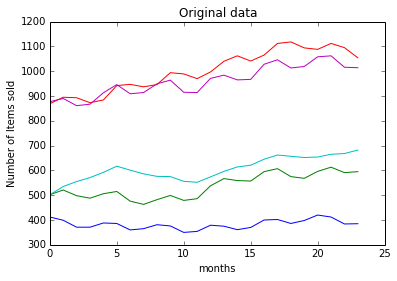

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[412,399,371,371,388,386,360,365,381,376,350,354,379,375,361,370,400,402,386,398,420,412,384,385],
             [502,521,498,488,506,515,476,463,482,499,479,486,538,567,559,557,595,607,575,568,596,613,591,595],
             [869,895,893,873,884,942,947,937,946,994,989,970,997,1040,1062,1041,1065,1112,1118,1094,1088,1112,1095,1054],
             [502,535,555,571,592,617,601,586,576,575,556,552,574,596,614,621,645,662,657,652,654,665,668,682],
             [877,890,861,867,913,946,909,914,949,964,915,914,971,984,965,967,1028,1046,1013,1019,1058,1062,1016,1014]])

for i in range(len(X)):
    plt.plot(X[i])
plt.xlabel('months')
plt.ylabel('Number of Items sold')
plt.title('Original data')
plt.show()

In [2]:
A = np.zeros((len(X[0]),8))
for t in range(len(X[0])):
    #sin is used to model seasonality, cos used for the possible phase difference
    A[t] = np.array([1.0,1.0*t,np.sin(0.5*np.pi*t),np.cos(0.5*np.pi*t),np.sin(np.pi*t/6),np.cos(np.pi*t/6),np.sin(np.pi*t/12),np.cos(np.pi*t/12)])

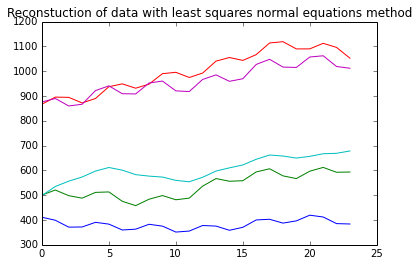

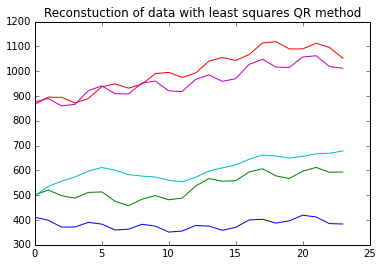

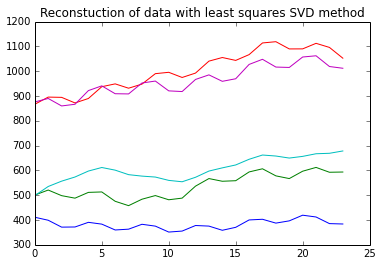

Relative Error table for item  1
[[  0.00000000e+00   4.31151592e-15   4.64841322e-15]
 [  4.31151592e-15   0.00000000e+00   8.95992915e-15]
 [  4.64841322e-15   8.95992915e-15   0.00000000e+00]]
Relative Error table for item  2
[[  0.00000000e+00   5.68938334e-15   1.07605931e-15]
 [  5.68938334e-15   0.00000000e+00   4.61332403e-15]
 [  1.07605931e-15   4.61332403e-15   0.00000000e+00]]
Relative Error table for item  3
[[  0.00000000e+00   1.91949201e-15   5.27349389e-15]
 [  1.91949201e-15   0.00000000e+00   3.35400188e-15]
 [  5.27349389e-15   3.35400188e-15   0.00000000e+00]]
Relative Error table for item  4
[[  0.00000000e+00   8.57297871e-16   2.04393810e-15]
 [  8.57297871e-16   0.00000000e+00   2.33922362e-15]
 [  2.04393810e-15   2.33922362e-15   0.00000000e+00]]
Relative Error table for item  5
[[  0.00000000e+00   6.31942286e-15   8.36988754e-16]
 [  6.31942286e-15   0.00000000e+00   6.32573980e-15]
 [  8.36988754e-16   6.32573980e-15   0.00000000e+00]]


In [3]:
#Least-squares with normal equations, QR factorization, and SVD
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[412,399,371,371,388,386,360,365,381,376,350,354,379,375,361,370,400,402,386,398,420,412,384,385],
             [502,521,498,488,506,515,476,463,482,499,479,486,538,567,559,557,595,607,575,568,596,613,591,595],
             [869,895,893,873,884,942,947,937,946,994,989,970,997,1040,1062,1041,1065,1112,1118,1094,1088,1112,1095,1054],
             [502,535,555,571,592,617,601,586,576,575,556,552,574,596,614,621,645,662,657,652,654,665,668,682],
             [877,890,861,867,913,946,909,914,949,964,915,914,971,984,965,967,1028,1046,1013,1019,1058,1062,1016,1014]])

def solve_upper_triangular(A,b):
    x = np.zeros((len(b)))
    for i in range(len(x)):
        j = len(x)-1-i
        if i == 0:
            x[j] = 1.0*b[j]/A[j,j]
        else:
            b_num = b[j]
            for k in np.arange(j,len(x)):
                b_num = b_num - A[j,k]*x[k]
            x[j] = 1.0*b_num/A[j,j]
    return x

A = np.zeros((len(X[0]),8))
for t in range(len(X[0])):
    #sin is used to model seasonality, cos used for the possible phase difference
    A[t] = np.array([1.0,1.0*t,np.sin(0.5*np.pi*t),np.cos(0.5*np.pi*t),np.sin(np.pi*t/6),np.cos(np.pi*t/6),np.sin(np.pi*t/12),np.cos(np.pi*t/12)])

#solution with normal equations
w_normal_dict = {} #dictionary to keep w coefficients
for i in range(len(X)):
    a = A
    b = X[i]
    a_T_a = np.dot(a.conj().transpose(),a)
    a_T_b = np.dot(a.conj().transpose(),b)
    w = np.linalg.solve(a_T_a,a_T_b)
    w_normal_dict[i] = w

for i in range(len(X)):
    x = np.dot(A,w_normal_dict[i])
    plt.plot(x)
plt.title('Reconstuction of data with least squares normal equations method')
plt.show()
    
#solution with QR factorization
w_qr_dict = {} #dictionary to keep w coefficients
for i in range(len(X)):
    a = A
    b = X[i]
    q, r = np.linalg.qr(a)
    q_T_b = np.dot(q.conj().transpose(),b)
    w = solve_upper_triangular(r,q_T_b)
    w_qr_dict[i] = w

for i in range(len(X)):
    x = np.dot(A,w_qr_dict[i])
    plt.plot(x)
plt.title('Reconstuction of data with least squares QR method')
plt.show()

#solution with SVD
w_svd_dict = {} #dictionary to keep w coefficients
for i in range(len(X)):
    a = A
    b = X[i]
    #reduced SVD
    U, s, V_T = np.linalg.svd(a, full_matrices=False)
    S = np.diag(s)
    V = V_T.T
    u_T_b = np.dot(U.conj().transpose(),b)
    m = solve_upper_triangular(S,u_T_b)
    w = np.dot(V,m)
    w_svd_dict[i] = w

for i in range(len(X)):
    x = np.dot(A,w_svd_dict[i])
    plt.plot(x)
plt.title('Reconstuction of data with least squares SVD method')
plt.show()

#predictions for the next 6 months
A_future = np.zeros((6,8)) #A matrix for the next 6 months
for i in range(6):
    t = i + len(X[0])
    A_future[i] = np.array([1.0,1.0*t,np.sin(0.5*np.pi*t),np.cos(0.5*np.pi*t),np.sin(np.pi*t/6),np.cos(np.pi*t/6),np.sin(np.pi*t/12),np.cos(np.pi*t/12)])

#going over all items and produce relative error table    
for i in range(len(X)):
    relative_Error = np.zeros((3,3))
    for j in range(6):
        y_normal = np.dot(A_future[j],w_normal_dict[i])
        y_qr = np.dot(A_future[j],w_qr_dict[i])
        y_svd = np.dot(A_future[j],w_svd_dict[i])
        relative_Error[0,1] = relative_Error[0,1] + 1.0*abs(y_normal-y_qr)/y_qr
        relative_Error[0,2] = relative_Error[0,2] + 1.0*abs(y_normal-y_svd)/y_svd
        relative_Error[1,0] = relative_Error[1,0] + 1.0*abs(y_normal-y_qr)/y_normal
        relative_Error[1,2] = relative_Error[1,2] + 1.0*abs(y_svd-y_qr)/y_svd
        relative_Error[2,0] = relative_Error[2,0] + 1.0*abs(y_normal-y_svd)/y_normal
        relative_Error[2,1] = relative_Error[2,1] + 1.0*abs(y_svd-y_qr)/y_qr
    print "Relative Error table for item ",i+1
    print relative_Error

In [11]:
#same operations but this time as a function
import numpy as np

def solve_upper_triangular(A,b):
    x = np.zeros((len(b)))
    for i in range(len(x)):
        j = len(x)-1-i
        if i == 0:
            x[j] = 1.0*b[j]/A[j,j]
        else:
            b_num = b[j]
            for k in np.arange(j,len(x)):
                b_num = b_num - A[j,k]*x[k]
            x[j] = 1.0*b_num/A[j,j]
    return x

def project1(salesdata1,testdata1=None):
    X_dict = {}
    count = 0
    for line in file(salesdata1, 'r'):
        x_array = np.array([])
        for num in line.strip().split(' '):
            s = float(num)
            x_array = np.append(x_array,s)
        X_dict[count] = x_array
        count = count + 1
    X = np.zeros((len(X_dict),len(X_dict[0])))
    for i in range(len(X_dict)):
        X[i] = X_dict[i]
        
    A = np.zeros((len(X[0]),8))
    for t in range(len(X[0])):
        #sin is used to model seasonality, cos used for the possible phase difference
        A[t] = np.array([1.0,1.0*t,np.sin(0.5*np.pi*t),np.cos(0.5*np.pi*t),np.sin(np.pi*t/6),np.cos(np.pi*t/6),np.sin(np.pi*t/12),np.cos(np.pi*t/12)])

    #solution with normal equations
    w_normal_dict = {} #dictionary to keep w coefficients
    for i in range(len(X)):
        a = A
        b = X[i]
        a_T_a = np.dot(a.conj().transpose(),a)
        a_T_b = np.dot(a.conj().transpose(),b)
        w = np.linalg.solve(a_T_a,a_T_b)
        w_normal_dict[i] = w
    
    #solution with QR factorization
    w_qr_dict = {} #dictionary to keep w coefficients
    for i in range(len(X)):
        a = A
        b = X[i]
        q, r = np.linalg.qr(a)
        q_T_b = np.dot(q.conj().transpose(),b)
        w = solve_upper_triangular(r,q_T_b)
        w_qr_dict[i] = w

    #solution with SVD
    w_svd_dict = {} #dictionary to keep w coefficients
    for i in range(len(X)):
        a = A
        b = X[i]
        #reduced SVD
        U, s, V_T = np.linalg.svd(a, full_matrices=False)
        S = np.diag(s)
        V = V_T.T
        u_T_b = np.dot(U.conj().transpose(),b)
        m = solve_upper_triangular(S,u_T_b)
        w = np.dot(V,m)
        w_svd_dict[i] = w

    #predictions for the next 6 months
    A_future = np.zeros((6,8)) #A matrix for the next 6 months
    for i in range(6):
        t = i + len(X[0])
        A_future[i] = np.array([1.0,1.0*t,np.sin(0.5*np.pi*t),np.cos(0.5*np.pi*t),np.sin(np.pi*t/6),np.cos(np.pi*t/6),np.sin(np.pi*t/12),np.cos(np.pi*t/12)])
    
    #make predictions for each item
    p_svd_dict = {}
    for i in range(len(X)):
        print "Predictions with normal equations for item ",i+1
        p_normal = np.dot(A_future,w_normal_dict[i])
        print p_normal
        print "Predictions with qr for item ",i+1
        p_qr = np.dot(A_future,w_qr_dict[i])
        print p_qr
        print "Predictions with svd equations for item ",i+1
        p_svd = np.dot(A_future,w_svd_dict[i])
        print p_svd
        p_svd_dict[i] = p_svd
    #compare with the test data, if there is a test data
    if testdata1 != None:
        R_dict = {}
        count = 0
        for line in file(testdata1, 'r'):
            r_array = np.array([])
            for num in line.strip().split(' '):
                s = float(num)
                r_array = np.append(r_array,s)
            R_dict[count] = r_array
            count = count + 1
        R = np.zeros((len(R_dict),len(R_dict[0])))
        for i in range(len(R_dict)):
            R[i] = R_dict[i]
        #comparison for each item
        for i in range(len(R)):
            print "Error for item ",i+1
            print np.sqrt(np.inner((p_svd_dict[i]-R[i]),(p_svd_dict[i]-R[i])))
    
        
        
project1("salesdata1.txt")

Predictions with normal equations for item  1
[ 398.43962295  386.35447492  358.57893734  359.19057805  377.94709037
  370.71707153]
Predictions with qr for item  1
[ 398.43962295  386.35447492  358.57893734  359.19057805  377.94709037
  370.71707153]
Predictions with svd equations for item  1
[ 398.43962295  386.35447492  358.57893734  359.19057805  377.94709037
  370.71707153]
Predictions with normal equations for item  2
[ 633.50728676  653.6405252   631.01725399  620.91576101  644.19228316
  645.98079773]
Predictions with qr for item  2
[ 633.50728676  653.6405252   631.01725399  620.91576101  644.19228316
  645.98079773]
Predictions with svd equations for item  2
[ 633.50728676  653.6405252   631.01725399  620.91576101  644.19228316
  645.98079773]
Predictions with normal equations for item  3
[ 1048.53632354  1077.35221848  1076.31760248  1053.79551944  1071.75656889
  1119.26273192]
Predictions with qr for item  3
[ 1048.53632354  1077.35221848  1076.31760248  1053.79551944  107

weight array w:
[ 2.52209548 -2.18817299 -1.62320984  1.42494443 -0.57396546  0.2732869
  0.90757079 -1.51982806  0.22870448  0.84939496  0.23058069 -1.26993938
 -0.31581521  0.97418965 -1.34727399  0.9698161   0.81163721 -1.6506784
  1.21551796  0.3170616   4.28731248 -6.351612   -2.40426276  3.37148243
 -0.62778674 -0.76311339 -0.32415958 -1.99334108  1.39010766  2.86839427
  1.41598029 -2.25560366 -0.47014781  0.91688966 -1.10072404  0.18020094
  1.55779232 -1.48414229  0.19503922  1.44627123  3.80780438 -5.18646178
 -2.88071375  2.70876265 -1.67460061  0.49452959  1.70498189 -3.11151469
  1.44922167  2.32963244]


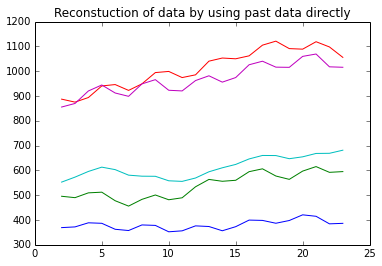

Predictions for the next month for each item:
[  399.97995601   636.42792617  1047.53876845   716.48999915  1058.461429  ]


In [12]:
#Least squares using directly past data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def solve_upper_triangular(A,b):
    x = np.zeros((len(b)))
    for i in range(len(x)):
        j = len(x)-1-i
        if i == 0:
            x[j] = 1.0*b[j]/A[j,j]
        else:
            b_num = b[j]
            for k in np.arange(j,len(x)):
                b_num = b_num - A[j,k]*x[k]
            x[j] = 1.0*b_num/A[j,j]
    return x

def project2(D_tau,salesdata1,testdata1=None):
    X_dict = {}
    count = 0
    for line in file(salesdata1, 'r'):
        x_array = np.array([])
        for num in line.strip().split(' '):
            if num != 'NaN':
                s = float(num)
                x_array = np.append(x_array,s)
            else:
                s = -1.0 #to mark missing values
                x_array = np.append(x_array,s)
        #determine the missing values
        for i in range(len(x_array)):
            if x_array[i]==-1:
                if i==0:
                    for j in range(len(x_array)-1):
                        if x_array[j+1]>0:
                            x_array[i] = x_array[j+1]
                            break
                elif i==(len(x_array)-1):
                    x_array[i] = x_array[i-1]
                else:
                    if x_array[i+1]>0:
                        x_array[i] = (x_array[i+1]+x_array[i-1])/2
                    else:
                        x_array[i] = x_array[i-1]
        X_dict[count] = x_array
        count = count + 1
    X = np.zeros((len(X_dict),len(X_dict[0])))
    for i in range(len(X_dict)):
        X[i] = X_dict[i]
    
    T = len(X[0]) #number of time steps
    N = len(X) #number of items
    
    #construction of b vector
    b = np.zeros((N*(T-D_tau)))
    count = 0
    for i in range(N):
        for j in range(T-D_tau):
            k = j + D_tau
            b[count] = X[i,k]
            count = count + 1
    
    #construction of A matrix
    A = np.zeros((N*(T-D_tau),N*N*D_tau))
    for i in range(N):
        for j in range(T-D_tau):
            t = j + D_tau
            count_t = 1
            count_item = 0
            for k in np.arange(i*N*D_tau,(i+1)*N*D_tau):
                A[i*(T-D_tau)+j,k] = X[count_item,t-count_t]
                if count_t == D_tau:
                    count_t = 1
                    count_item = count_item + 1
                else:
                    count_t = count_t + 1
                    
    #solution with reduced SVD
    U, s, V_T = np.linalg.svd(A, full_matrices=False)
    S = np.diag(s)
    V = V_T.T
    u_T_b = np.dot(U.conj().transpose(),b)
    m = solve_upper_triangular(S,u_T_b)
    w = np.dot(V,m)
    print "weight array w:"
    print w
    
    #reconstruction of data
    for i in range(N):
        a = A[i*(T-D_tau):(i+1)*(T-D_tau),:]
        x_vec = np.dot(a,w)
        y_vec = np.arange(D_tau,T)
        plt.plot(y_vec,x_vec)
    plt.title('Reconstuction of data by using past data directly')
    plt.show()
    
    #predictions for each item for the next month
    A_future = np.zeros((N,N*N*D_tau))
    for i in range(N):
        t = T
        count_t = 1
        count_item = 0
        for k in np.arange(i*N*D_tau,(i+1)*N*D_tau):
            A_future[i,k] = X[count_item,t-count_t]
            if count_t == D_tau:
                count_t = 1
                count_item = count_item + 1
            else:
                count_t = count_t + 1
    predictions = np.dot(A_future,w)
    print "Predictions for the next month for each item:"
    print predictions
        
    

project2(2,"salesdata1.txt")

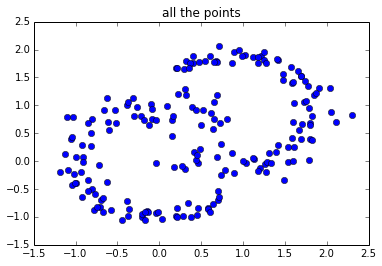

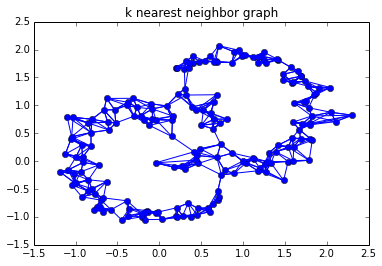

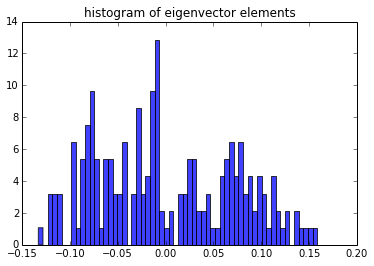

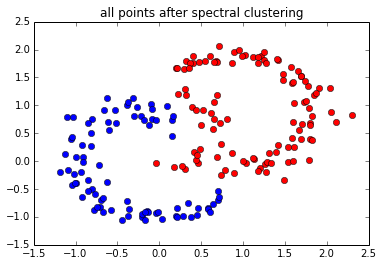

In [3]:
#spectral clustering
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

def spectral_cluster(points,k,sigma,tau=0):
    #take points as a string and convert
    P_dict = {}
    count = 0
    count2 = 0
    p_array = np.array([])
    for num in points.strip().split(' '):
        s = float(num)
        p_array = np.append(p_array,s)
        count2 = count2 + 1
        if count2==2:
            P_dict[count] = p_array
            count2 = 0
            count = count + 1
            p_array = np.array([])
    P = np.zeros((len(P_dict),len(P_dict[0])))
    for i in range(len(P_dict)):
        P[i] = P_dict[i]
    #ploting points
    for p in P:
        plt.plot(p[0],p[1],'bo')
    plt.title('all the points')
    plt.show()
    
    N = len(P)#number of points
    distanceMatrix = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            dist = np.sqrt(np.inner((P[i]-P[j]),(P[i]-P[j]))) #eucledian distance between two points
            if i==j:
                dist = 100
            distanceMatrix[i,j] = dist
    
    #k-nearest neighbor graph
    k_ind_Matrix = np.zeros((N,k)) #to keep k nearest point indices of a point
    for i in range(N):
        dist_array = -1*distanceMatrix[i] #make the min distance max value
        k_ind = dist_array.argsort()[-k:][::-1] #k max values
        k_ind_Matrix[i] = k_ind
    for p in P:
        plt.plot(p[0],p[1],'bo')
    for i in range(N):
        for j in range(k):
            xvals = np.array([P[i,0],P[k_ind_Matrix[i,j],0]])
            yvals = np.array([P[i,1],P[k_ind_Matrix[i,j],1]])
            plt.plot(xvals,yvals,"b-")
    plt.title('k nearest neighbor graph')
    plt.show()
    
    #constructing weight matrix W
    W = np.zeros((N,N))
    for i in range(N):
        for j in k_ind_Matrix[i]:
            W[i,j] = np.exp(-0.5*(distanceMatrix[i,j]/sigma)**2)
            #we also accept (j,i) to protect symetry. So some vertices now have more than k neighbor
            W[j,i] = np.exp(-0.5*(distanceMatrix[i,j]/sigma)**2)
    
    #Computing Laplacian matrix
    D = np.zeros((N,N))
    invD = np.zeros((N,N))
    for i in range(N):
        D[i,i] = sum(W[i])
        invD[i,i] = 1.0/D[i,i]
    T = np.dot(W,invD)
    L = np.identity(N) - T
    
    #inverse iteration in order to find second smallest eigenvalue and corresponding eigenvector of L
    e_val = 0
    mu = 0.0001
    while e_val<0.00005:
        e_vec = np.random.rand(N,1)
        for i in range(50):
            w_vec = np.linalg.solve((L-mu*np.identity(N)),e_vec)
            e_vec = w_vec/np.linalg.norm(w_vec)
            e_val = np.dot(e_vec.conj().transpose(),np.dot(L,e_vec))
        mu = mu + 0.0001
    
    #histogram of eigenvector values
    plt.hist(e_vec, 60, normed=1, facecolor='blue', alpha=0.75)
    plt.title('histogram of eigenvector elements')
    plt.show()
    
    #Cluster plot
    for i in range(N):
        if e_vec[i][0]<tau:
            plt.plot(P[i,0],P[i,1],'ro')
        else:
            plt.plot(P[i,0],P[i,1],'bo')
    plt.title('all points after spectral clustering')
    plt.show()
                           


points_string = "1.8041 0.6784 2.0438 1.3186 1.7267 1.0516 -0.3849 -0.7118 0.6754 1.7853 0.5495 1.7915 0.7096 2.0687 1.5394 -0.0084 -0.6608 0.9144 1.7801 1.3404 0.1777 -0.1121 -1.0558 0.3911 1.0338 -0.0374 1.7965 0.6487 -1.0000 -0.4010 -0.7828 -0.8704 -1.1899 -0.1892 -1.0406 -0.4323 1.5998 0.0093 1.6721 0.5654 -0.2042 -0.9981 1.8053 0.3997 -0.1179 0.6405 1.8531 1.1769 -0.7254 -0.0714 1.1200 1.8603 1.2711 -0.1937 1.4852 -0.3463 0.1551 0.7342 0.2080 -0.8365 0.0353 -1.0441 0.7240 0.6787 0.1960 -0.9874 0.6123 0.8548 1.6875 0.4047 1.7907 0.0139 0.4619 -0.8482 -0.2108 -0.9427 1.9062 1.3045 0.6965 -0.7017 -0.1498 -0.8879 0.4032 1.8863 1.1981 -0.1201 0.5038 0.6427 -0.8036 0.7512 -0.3867 0.9984 -0.9929 0.0796 0.8957 1.9576 0.6104 1.8812 1.8283 0.3746 -0.0384 -0.9373 -1.0897 -0.1580 -0.5749 -0.8707 -1.0135 -0.2355 1.5883 1.3974 -0.1382 -0.9088 1.6112 1.0404 1.7054 0.6626 -0.0826 0.7480 -0.1706 -0.9147 -0.8070 -0.4935 -0.2230 0.8121 1.0266 1.8979 1.6877 1.5232 1.6596 1.6200 2.1073 0.7092 0.6942 1.7704 -0.9167 0.0697 -1.1005 0.7904 -0.5194 0.6836 -0.4495 -1.0545 1.7844 0.9555 0.3844 -0.9948 0.3000 1.6577 1.5980 1.4144 -0.9080 -0.0232 -0.6166 0.6981 1.6930 1.5175 0.9481 1.9875 1.5416 0.2478 0.9958 -0.0008 0.2080 -1.0085 -0.6968 -0.6995 0.5853 -0.8335 0.5270 0.9143 0.8920 -0.2195 1.1748 1.7588 0.0870 0.9883 -0.7729 -0.5863 -0.1664 -1.0489 0.6559 1.0658 0.4165 0.1672 1.3890 0.1669 -0.8468 -0.5381 0.3040 -0.1485 -0.0159 -0.9139 -1.0051 -0.3978 0.8693 1.7659 -0.3754 1.0541 0.6383 -0.7723 0.6444 0.5768 0.6842 1.1894 0.1941 1.6765 1.7583 1.0854 0.3221 1.7879 -0.3032 0.8039 -1.1221 0.1256 1.4760 1.4537 1.2173 1.8821 1.7455 1.4349 -1.0465 0.4358 -0.9252 -0.6406 1.4218 1.8117 -0.8154 0.2656 2.3067 0.8224 0.7337 0.2999 1.1844 1.8742 1.8210 0.8082 0.1613 0.8070 1.4788 1.5544 -0.6026 0.5581 1.8762 1.2258 0.3064 1.2996 0.4089 1.7655 1.2606 -0.0482 1.2922 -0.0085 0.7427 -0.2490 0.6985 -0.5397 -0.1776 0.7448 1.4060 1.8302 0.4664 -0.0426 0.7799 -0.1661 1.5858 0.4104 0.2184 1.1946 0.3921 0.9686 0.3187 1.1836 0.4366 0.0175 -0.7099 -0.8305 1.5980 0.6986 0.6562 0.7510 0.3648 1.7566 2.0491 0.8758 -0.6675 -0.6591 -0.7451 -0.8168 -0.8486 0.6826 -0.3124 1.1251 -0.0935 1.0268 0.2788 -0.9795 0.5770 -0.8618 -0.6706 -0.9095 -0.3759 -0.9815 1.3104 0.1481 1.2499 1.8183 0.3512 1.6688 0.2118 1.6620 1.1275 0.0321 1.2479 1.9534 0.4427 0.9236 0.6509 1.7808 -0.8461 -0.3358 0.6869 0.0662 1.5716 1.6811 0.8724 0.1445 0.6042 -0.9059 -0.9377 -0.1915 0.1496 0.4422 0.2753 -0.0930 -0.8153 0.5125 -0.6294 1.1229 1.3345 -0.0321 0.8068 0.7538 1.2756 1.7557 -0.2652 0.9621 -0.9262 0.2884 0.7134 -0.6414 -1.0300 0.7837 0.4516 -0.9603 1.1223 0.0580 1.1776 -0.1736 0.4456 0.1014 -0.3597 -0.8503 0.4753 1.7764 0.3456 -0.7520 -0.6290 -0.3676 -0.0431 -0.0311 -0.5333 0.9211 1.6069 0.2535 1.4141 0.2811 -0.0813 0.9349 -0.0388 0.7433 0.4890 0.2214 0.9895 1.8892"  
spectral_cluster(points_string,5,0.3)